This notebook demonstrates how to perfomr systematic the policy assessment and render the policy cards. 

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from res_ind_lib import *

#Imports the function to plot render the policy experiments
from policy_assessment import *

#ask jupyter to display the plots within this notebook
%matplotlib inline

# Data

## baseline data

In [2]:
#Load the excel data file into a dataframe (table)
df_original=pd.read_excel("inputs/all_data_compiled.xlsx", 
                 index_col=0, #tells Pandas to use the first column (Provinces) as the index of the table
                 skiprows=[0, 2] #The first (0) row is a description of the variables and the 3rd (2) row is empty. We skip them
                ).dropna() 
df_original.index.name="province"
#Displays the first rows of that dataframe
df_original=def_ref_values(df_original)


## policy experiment data

# Parameters

In [3]:
colors = pd.read_csv("inputs/colors_pol_assess.csv", index_col=0)
pol_assess_set = colors.index
colors

,color,edgecolor,alpha
dWtot_currency,#a6cee3,#1f78b4,1
dKtot,#cccccc,#969696,1


In [4]:
#unit for welfare and asset loses changes
unit = dict(multiplier = 1e-6, string = "milliones de bolivianos por año")

In [5]:
##POLICY DESCRIPTION
policy_info= pd.read_csv("inputs/policy_description.csv",index_col=0, encoding="utf-8")

#Policy Labels (y axis)
policy_labels = policy_info.descriptor.copy() #we make a copy so we can modify it later
policy_labels.head()

#size of the policy
pol_increment = policy_info.increment    

# Checking for out of bound problems

In [6]:
bounds= pd.read_csv("inputs/inputs_info.csv", index_col="key")
bounds.head(3)   

,descriptor,inf,sup
key,,,
avg_prod_k,Productivity of capital,0,10
dcap,Average consumption losses for poor people in ...,0,NaN
dcar,Average consumption losses for nonpoor people ...,0,NaN


In [7]:
clipped = check_bounds(df_original+pol_increment, bounds)

clipped fap in Thai Binh


# Computing

In [8]:
deltas = compute_policies(df_original,pol_increment,pol_assess_set, bounds)
deltas.head()

Currently working on:  done.


province           An Giang                  Ba Ria - Vung Tau                 \
outputs               dKtot   dWtot_currency             dKtot dWtot_currency   
inputs                                                                          
T_rebuild_K        0.000000  15114556.670880               NaN            NaN   
cp           1210720.042804  -5498958.477804               NaN            NaN   
cr           3766508.904766  -2312584.281877               NaN            NaN   
fap           237428.489810   2355610.136004               NaN            NaN   
far          3437612.275481   4322538.921158               NaN            NaN   

province          Bac Giang                         Bac Kan                  \
outputs               dKtot   dWtot_currency          dKtot  dWtot_currency   
inputs                                                                        
T_rebuild_K        0.000000  15506773.466919       0.000000  1631956.919817   
cp           2158094.846522 -13728757.586614  227294.156539 -1445374.278651   
cr           1491907.425808   -960803.756820  157130.183843  -101160.977730   
fap           451374.892638   6373280.457236   79536.656939  1122162.335436   
far          1771293.052080   2333366.858206  312119.105692   410898.112715   

province           Bac Lieu                        ...              Tra Vinh  \
outputs               dKtot   dWtot_currency       ...                 dKtot   
inputs                                             ...                         
T_rebuild_K        0.000000  18032444.057103       ...              0.000000   
cp           1436309.959091  -6544044.986478       ...         800251.824947   
cr           4468311.467273  -2750420.386233       ...        2489556.229478   
fap           145828.742537   1455909.979478       ...         111222.385603   
far          2111383.835457   2668347.686917       ...        1610335.130227   

province                        Tuyen Quang                       Vinh Long  \
outputs       dWtot_currency          dKtot  dWtot_currency           dKtot   
inputs                                                                        
T_rebuild_K  10015228.667361       0.000000  5742843.131656        0.000000   
cp           -3639684.020433  799558.071232 -5085362.754911   635071.303381   
cr           -1530256.693119  552740.592360  -355910.488413  1975685.240832   
fap           1106528.682230  212156.707885  2994365.822948   114019.691035   
far           2029389.960190  832548.971506  1096366.175073  1650835.962702   

province                          Vinh Phuc                        Yen Bai  \
outputs      dWtot_currency           dKtot  dWtot_currency          dKtot   
inputs                                                                       
T_rebuild_K  7932628.920567        0.000000  5633684.954722       0.000000   
cp          -2885319.596017   121786.118041  -446467.219500  747712.715736   
cr          -1213346.681449  2280925.441846 -1106661.094188  516899.502715   
fap          1131930.497995    21215.576470   167464.682299  225720.662686   
far          2076839.992554  1800992.029419  1782938.266370  885776.874276   

province                     
outputs      dWtot_currency  
inputs                       
T_rebuild_K  5369493.623201  
cp          -4755177.093656  
cr           -332807.020161  
fap          3185219.901557  
far          1166283.297381  

[5 rows x 128 columns]

In [9]:
deltas.sum(level="outputs",axis=1).head()

outputs,dKtot,dWtot_currency
inputs,,
T_rebuild_K,0.000000e+00,4.684960e+08
cp,3.740044e+07,-2.094500e+08
cr,1.177874e+08,-6.643719e+07
fap,8.380185e+06,1.035314e+08
far,1.217932e+08,1.338704e+08


Currently working on:  Quang Ninh


KeyError: 'T_rebuild_K'

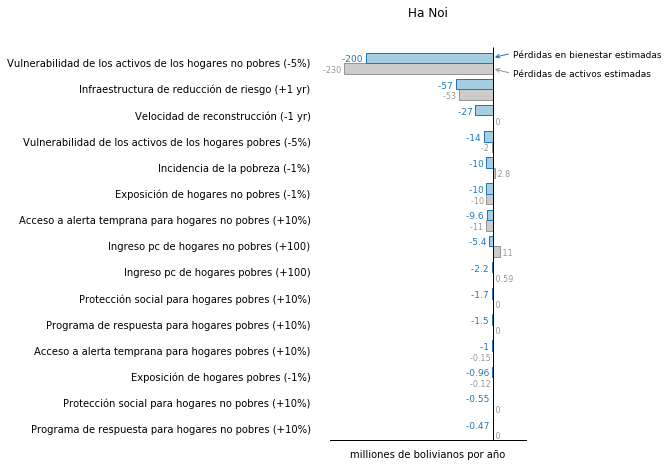

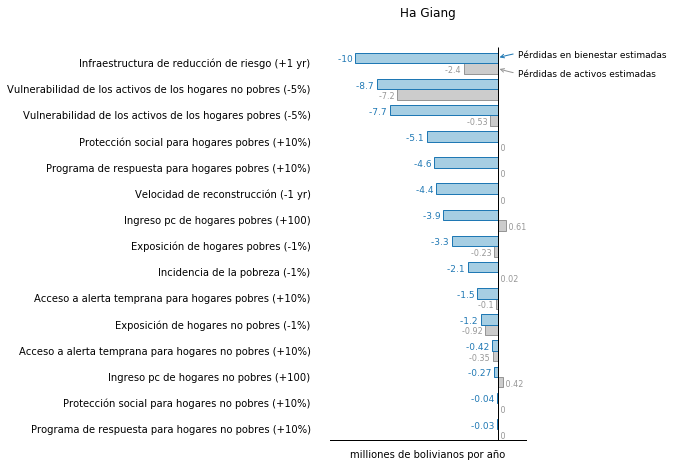

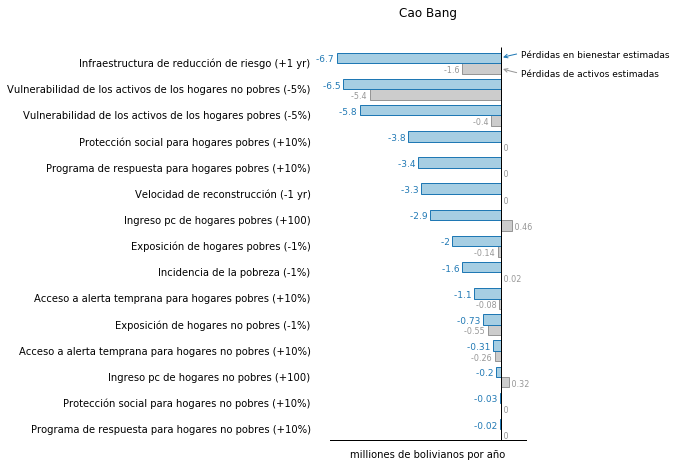

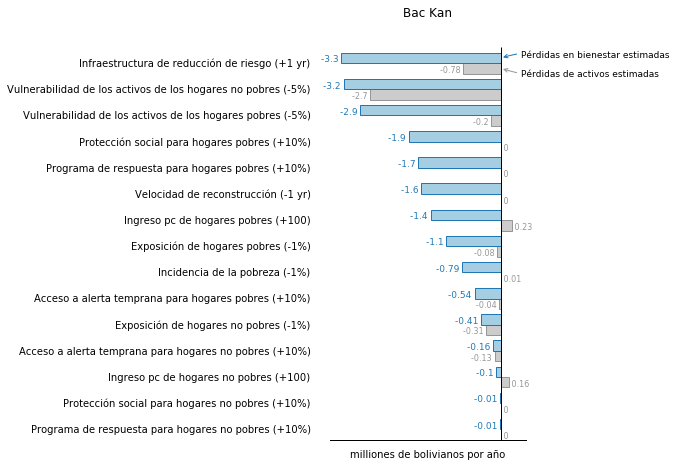

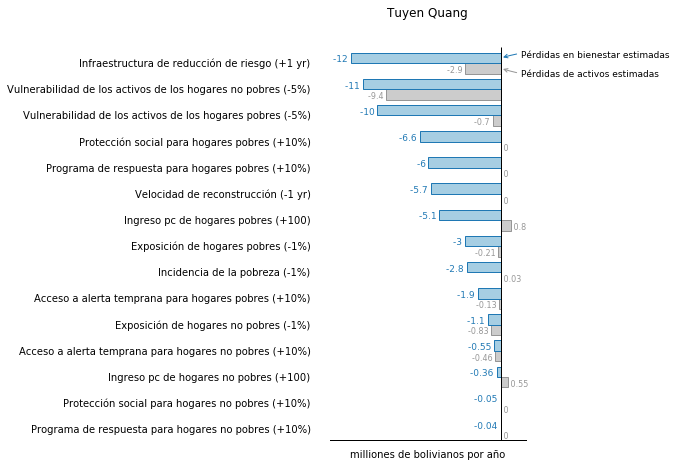

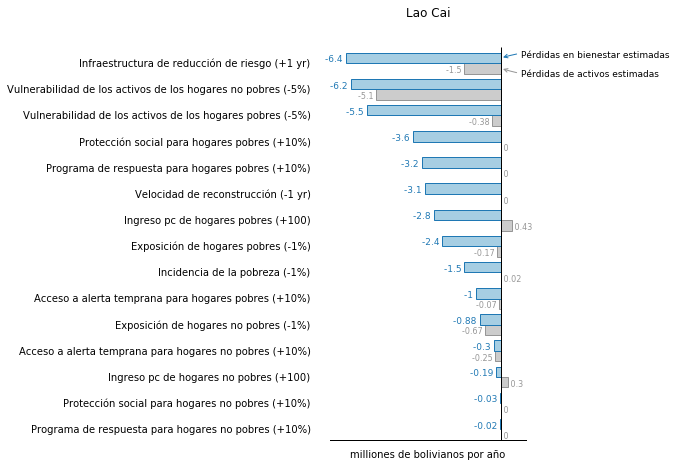

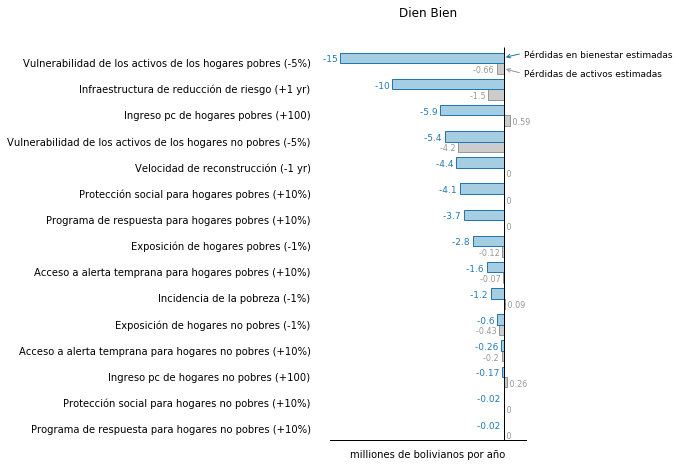

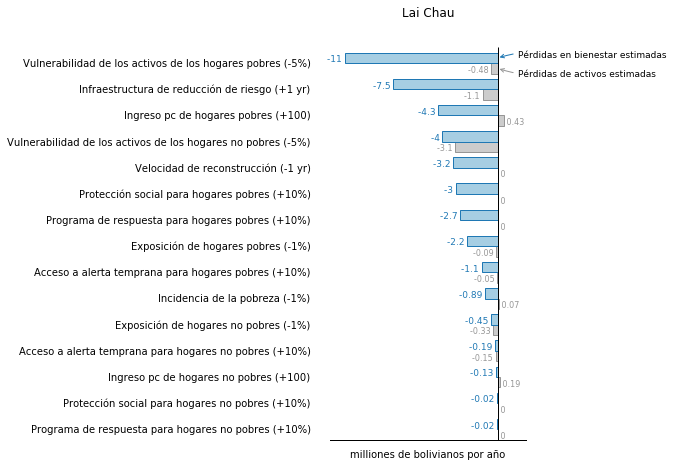

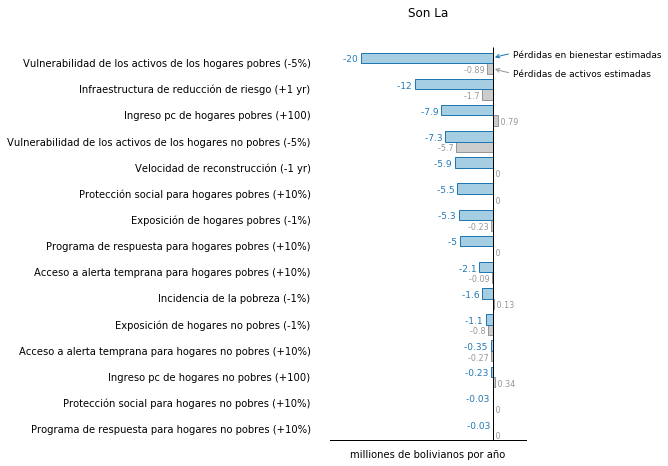

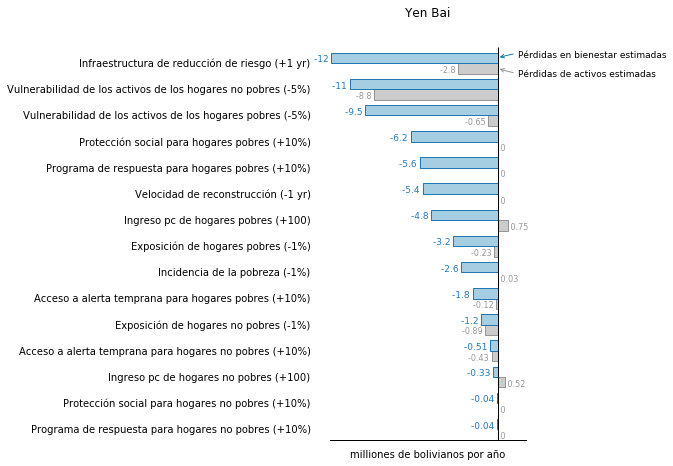

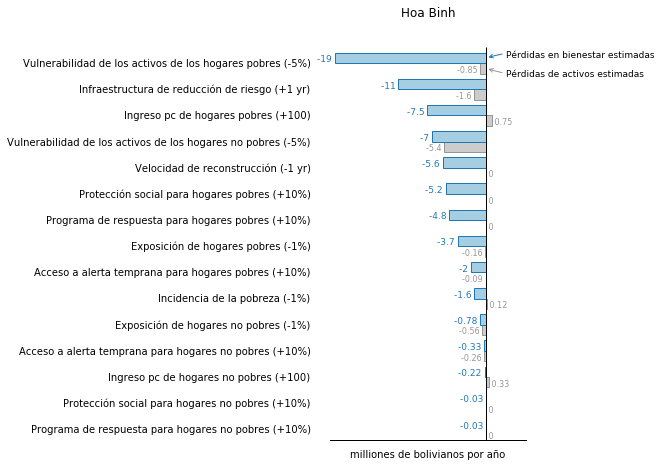

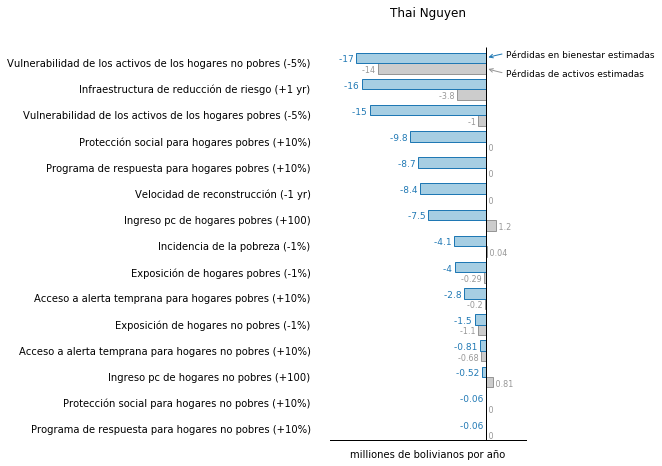

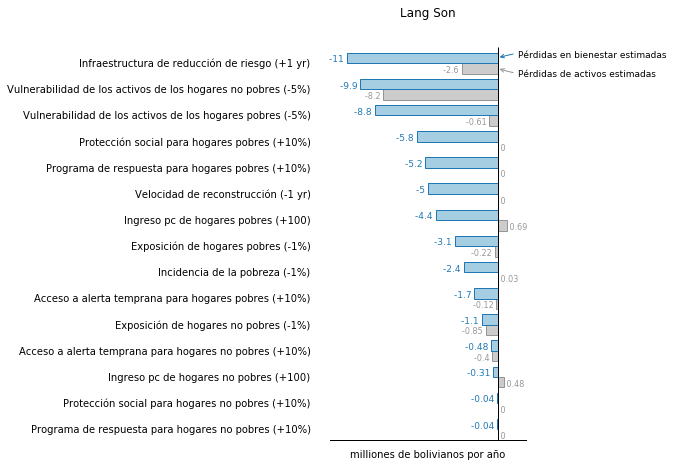

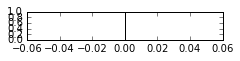

In [10]:
render_pol_cards(
    deltas,
    colors,
    policy_labels,
    pol_increment,
    unit,
    df_original.index)


Currently working on:  protection


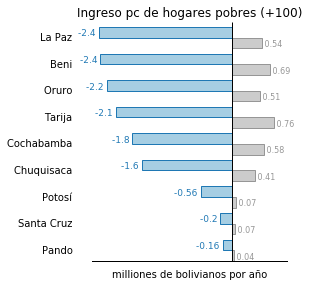

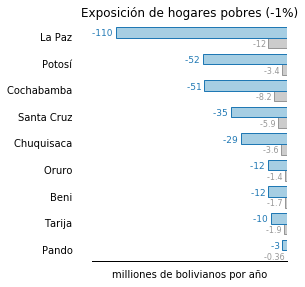

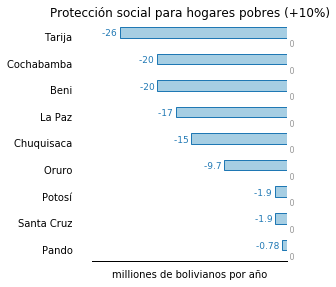

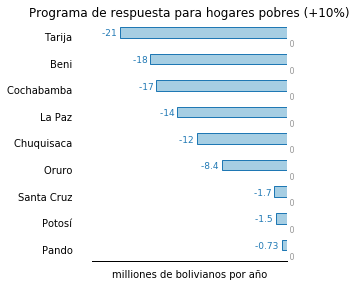

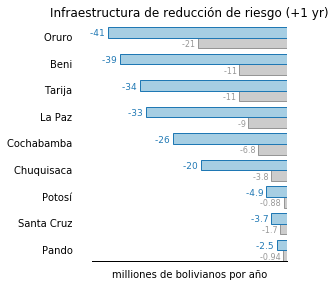

In [11]:
render_pol_cards_per_policy(
    deltas.stack("province").unstack("inputs").swaplevel("inputs","outputs",axis=1),
    colors,
    policy_labels,
    pol_increment,
    unit,
        ["cp", "fap", "social_p", "sigma_p", "protection"])

# Merge all cards to single pdf

Merges the individual province cards into one big multi page pdf. Requires ghostscript.

In [12]:
province_list=glob.glob("cards/*.pdf")
merge_cardfiles(province_list,"all_cards.pdf")

Merging cards....
Merging cards done


Converts the pdf files to png images. Requires Imagemagick.

In [13]:
convert_pdf_to_png("cards/")

Converting cards....
conversion to png done


# Demo: policy experiments on the multi-hazard data

Here we demonstrate how to do policy experiments on the multi hazard data. This is just a demo as the data we have now prevents us to have meaningful experiments (river floods and costal floods)

In [14]:
multi_hard_info=pd.read_csv("inputs/multi_hazard_data.csv", index_col=["province","hazard"])
multi_hard_info.head()

OSError: File b'inputs/multi_hazard_data.csv' does not exist

In [ ]:
fr=pd.read_csv("inputs/fa_ratios.csv", index_col=("province","hazard")).dropna()
fr.columns = fr.columns.astype(float)
fr.head()

## policy experiments on mh data

In [ ]:
##POLICY DESCRIPTION
policy_info_mh= pd.read_csv("inputs/policy_multihazard_description.csv",index_col=0)

#Policy Labels (y axis)
policy_labels_mh = policy_info_mh.descriptor.copy() #we make a copy so we can modify it later
policy_labels_mh.head()

#size of the policy
pol_increment_mh = policy_info_mh.increment    
pol_increment_mh.head()


## computation

In [ ]:
d_mh = compute_policies_mh(df_original,multi_hard_info,pol_increment_mh,pol_assess_set, bounds, fa_ratios=fr, multihazard_data =multi_hard_info)

## baseline mh data

In [ ]:
render_pol_cards(
    deltas.append(d_mh).drop("fap").drop("far"), #drop fap and far because superseded by multihazard info
    colors,
    policy_labels.append(policy_labels_mh),
    pol_increment.append(pol_increment_mh),
    unit,["Maguindanao"],
    outfolder="cards_coast_river/"
)

